# Clone repository

In [ ]:
!git clone https://github.com/jsaj/Multi_DES.git

# Imports

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from glob import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from yellowbrick.model_selection import FeatureImportances

# Create methods

In [28]:
def valores_iguais(lista):
    for i in range(1, len(lista)):
        if lista[i] != lista[0]:
            return False
    return True

In [29]:
def data_describe():
  df_info = []
  for data in ['AEEEM', 'NASA', 'PROMISE', 'RELINK']:
    for project_url in glob('/content/Multi_DES/benchmark-execution/benchmarks/datasets/{}/*'.format(data)):
      project_name = project_url.split('/')[len(project_url.split('/'))-1].split('.csv')[0]
      df_project = pd.read_csv(project_url)
      df_project = df_project.select_dtypes(exclude=['object'])
      instances = len(df_project)
      features = len(list(df_project.columns))

      y = df_project[df_project.columns[0]]
      bugs = list(np.unique(y))[1:]
      y = y.replace(bugs, 1)
      defective = np.count_nonzero(np.array(y) == 1)
      no_defective = np.count_nonzero(np.array(y) == 0)
      imbalance = 0
      if defective < no_defective:
        imbalance = defective/no_defective
      else:
        imbalance = no_defective/defective

      percent_bugs = round((np.count_nonzero(np.array(y) == 1) / len(y)) * 100, 2)
      
      values = [project_name, instances, features, percent_bugs, int(round(imbalance, 2) *100)] 

      df_info.append(pd.DataFrame([values], columns=['project', 'instances', 'features', 'defects (%)', 'imbalance']))
  df_info = pd.concat(df_info).reset_index(drop=True)
  return df_info

# Read data

In [30]:
df = pd.read_csv('/content/Multi_DES/benchmark-execution/benchmarks/CPDP_results.csv')

# Vizualization multiclass tree


*   CPDP methods
*   Calc feature Importance



--------------------------- fscore --------------------------
Feature: defects (%), Score: 0.558
Feature: instances, Score: 0.442
Feature: imbalance, Score: 0.0
Feature: features, Score: 0.0



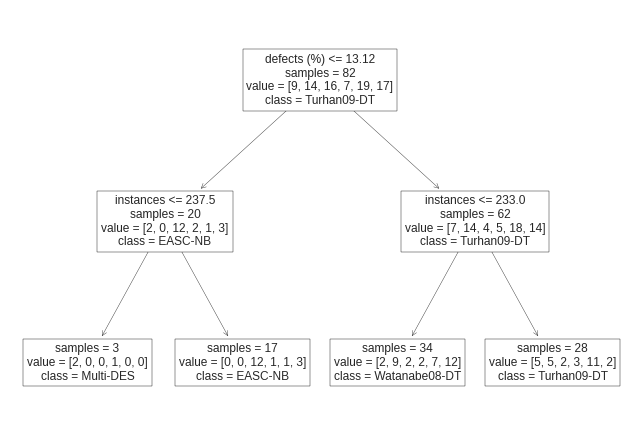

--------------------------- auc --------------------------
Feature: features, Score: 1.0
Feature: instances, Score: 0.0
Feature: imbalance, Score: 0.0
Feature: defects (%), Score: 0.0



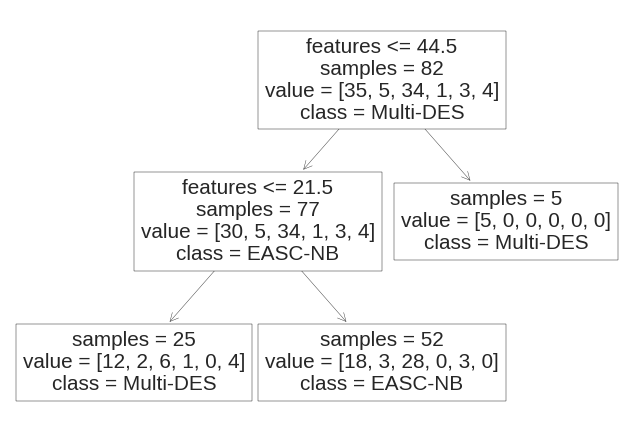

--------------------------- pf --------------------------
Feature: instances, Score: 0.835
Feature: imbalance, Score: 0.165
Feature: features, Score: 0.0
Feature: defects (%), Score: 0.0



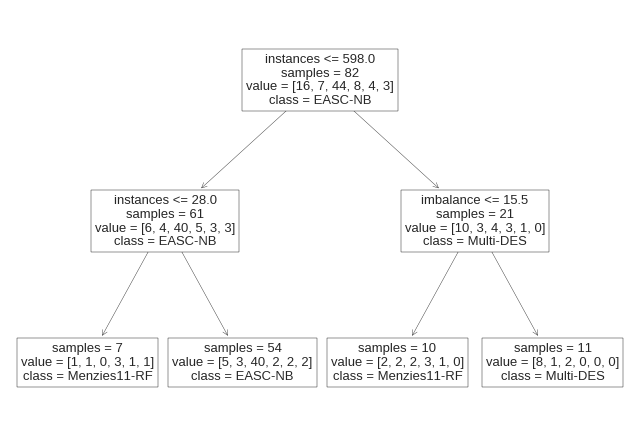

In [31]:

for metric in ['fscore', 'auc', 'pf']:
  print('--------------------------- {} --------------------------'.format(metric))
  metric_plot_tree = data_describe()
  
  for project in df['ProductName'].drop_duplicates().to_list():
    cpdp_scores = df.loc[(df['ProductName'] == project), ['Method', metric]].round(3)
    cpdp_scores = cpdp_scores.loc[cpdp_scores['Method'].isin(['Multi-DES', 'CamargoCruz09-DT', 'EASC-NB', 'Menzies11-RF', 'Turhan09-DT', 'Watanabe08-DT'])].transpose()
    cpdp_scores.columns = cpdp_scores[:1].values[0]
    
    cpdp_scores = cpdp_scores[1:].reset_index(drop=True)
    for col in cpdp_scores.columns:
      cpdp_scores[col] = cpdp_scores[col].astype(float)

    if metric != 'pf':

      if valores_iguais(list(cpdp_scores.values[0])) == True:
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
      else:
        method_best_value = cpdp_scores.idxmax(axis=1).values
        if len(method_best_value) > 1:
          metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
        
        else:
          metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = method_best_value[0]
    else:
      
      if valores_iguais(list(cpdp_scores.values[0])) == True:
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
      else:
        method_best_value = cpdp_scores.idxmin(axis=1)
        if len(method_best_value) > 1:
          metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
        else:
          metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = method_best_value[0]

  metric_plot_tree = metric_plot_tree.loc[metric_plot_tree['label'] != 'EMPATE']

  df_test = metric_plot_tree.drop(['project'], axis=1).reset_index(drop=True)

  df_test = df_test.replace(['Multi-DES', 'CamargoCruz09-DT', 'EASC-NB',
                             'Menzies11-RF', 'Turhan09-DT', 'Watanabe08-DT'],
                            [1, 2, 3, 4, 5, 6])
  
  classifier = DecisionTreeClassifier(max_depth=2)  # limit depth of tree

  X = df_test.drop(['label'], axis=1)
  y = df_test.label

  classifier.fit(X, y)

  # get importance
  importance = classifier.feature_importances_
  
  for importance, name in sorted(zip(classifier.feature_importances_, X.columns), reverse=True)[:5]:
    print('Feature: {}, Score: {}'.format(name, round(importance, 3)))
  print()
  tree.plot_tree(classifier,
                feature_names = X.columns,
                class_names=['Multi-DES', 'CamargoCruz09-DT', 'EASC-NB', 'Menzies11-RF', 'Turhan09-DT', 'Watanabe08-DT'],
                filled=False,
                impurity=False);     
  plt.show()                         

# Vizualization binary tree


*   Multi-DES vs EASC-NB
*   Calc feature Importance

--------------------------- fscore --------------------------
Feature: instances, Score: 0.547
Feature: imbalance, Score: 0.327
Feature: defects (%), Score: 0.127
Feature: features, Score: 0.0



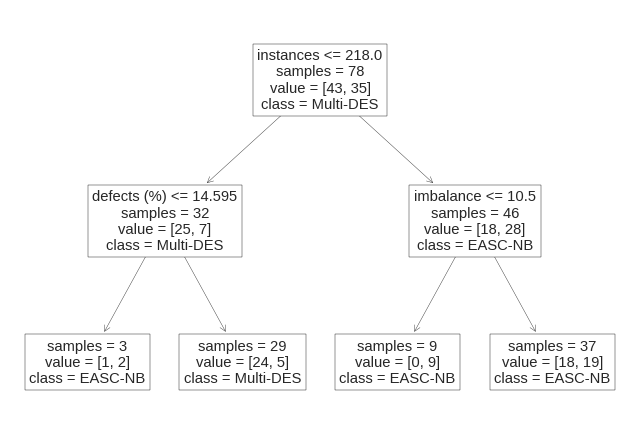

--------------------------- auc --------------------------
Feature: instances, Score: 0.898
Feature: imbalance, Score: 0.102
Feature: features, Score: 0.0
Feature: defects (%), Score: 0.0



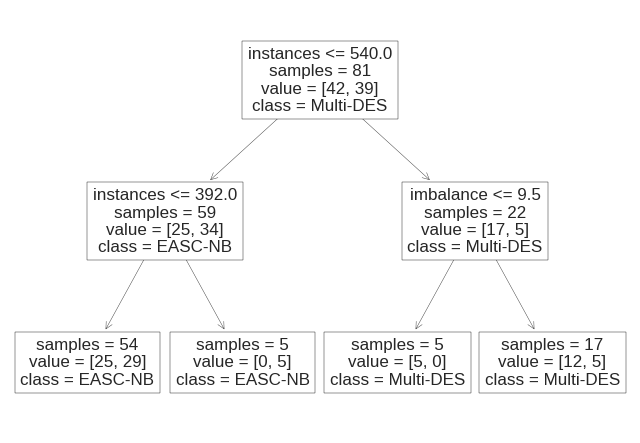

--------------------------- pf --------------------------
Feature: instances, Score: 0.809
Feature: defects (%), Score: 0.191
Feature: imbalance, Score: 0.0
Feature: features, Score: 0.0



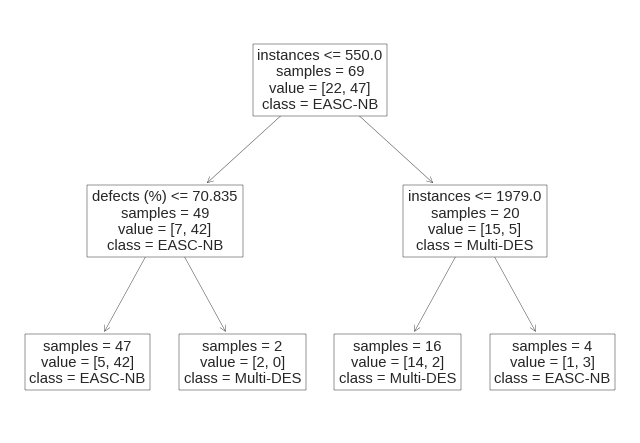

In [32]:
for metric in ['fscore', 'auc', 'pf']:
  print('--------------------------- {} --------------------------'.format(metric))

  # dataset/project information

  df_info = []
  for data in ['AEEEM', 'NASA', 'PROMISE', 'RELINK']:
    for project_url in glob('/content/Multi_DES/benchmark-execution/benchmarks/datasets/{}/*'.format(data)):
      project_name = project_url.split('/')[len(project_url.split('/'))-1].split('.csv')[0]
      df_project = pd.read_csv(project_url)
      df_project = df_project.select_dtypes(exclude=['object'])
      instances = len(df_project)
      features = len(list(df_project.columns))

      y = df_project[df_project.columns[0]]
      bugs = list(np.unique(y))[1:]
      y = y.replace(bugs, 1)
      defective = np.count_nonzero(np.array(y) == 1)
      no_defective = np.count_nonzero(np.array(y) == 0)
      imbalance = 0
      if defective < no_defective:
        imbalance = defective/no_defective
      else:
        imbalance = no_defective/defective

      percent_bugs = round((np.count_nonzero(np.array(y) == 1) / len(y)) * 100, 2)
      
      values = [project_name, instances, features, percent_bugs, int(round(imbalance, 2) *100)] 

      df_info.append(pd.DataFrame([values], columns=['project', 'instances', 'features', 'defects (%)', 'imbalance']))
  metric_plot_tree = pd.concat(df_info)
  
  for project in df['ProductName'].drop_duplicates().to_list():
    cpdp_scores = df.loc[(df['ProductName'] == project), ['Method', metric]].round(3)
    cpdp_scores = cpdp_scores.loc[cpdp_scores['Method'].isin(['Multi-DES', 'EASC-NB'])].transpose()
    cpdp_scores.columns = cpdp_scores[:1].values[0]
    cpdp_scores = cpdp_scores[1:].reset_index(drop=True)
    for col in cpdp_scores.columns:
      cpdp_scores[col] = cpdp_scores[col].astype(float)

    if metric != 'pf':
      x = df.loc[(df['ProductName'] == project) & (df[metric] == cpdp_scores.values[0].max()), 'Method'].values

      if valores_iguais(list(cpdp_scores.values[0])):
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
      else:
        method_best_value = cpdp_scores.idxmax(axis=1)
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = method_best_value
    else:
      
      x = df.loc[(df['ProductName'] == project) & (df[metric] == cpdp_scores.values[0].min()), 'Method'].values

      if valores_iguais(list(cpdp_scores.values[0])):
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = 'EMPATE'
      else:
        method_best_value = cpdp_scores.idxmin(axis=1)
        metric_plot_tree.loc[metric_plot_tree['project'] == project, 'label'] = method_best_value

  metric_plot_tree = metric_plot_tree.loc[metric_plot_tree['label'] != 'EMPATE']
  
  df_test = metric_plot_tree.drop(['project'], axis=1).reset_index(drop=True)

  df_test = df_test.replace(['Multi-DES', 'EASC-NB'],
                            [1, 2])
  
  classifier = DecisionTreeClassifier(max_depth=2)  # limit depth of tree

  X = df_test.drop(['label'], axis=1)
  y = df_test.label

  classifier.fit(X, y)

  # get importance
  importance = classifier.feature_importances_
  
  for importance, name in sorted(zip(classifier.feature_importances_, X.columns), reverse=True)[:5]:
    print('Feature: {}, Score: {}'.format(name, round(importance, 3)))
  print()
  tree.plot_tree(classifier,
                feature_names = X.columns,
                class_names=['Multi-DES', 'EASC-NB'],
                filled=False,
                impurity=False);     
  plt.show()                         